In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/US_Accidents_March23.csv'
df = pd.read_csv(file_path, nrows=50000)
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
print(df.columns)
print(df.info())
miss = df.isnull().sum().sort_values(ascending=False)
print("Top missing:\n", miss.head(20))

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  o

In [ ]:
cols = ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
        'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
        'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset', 'Distance(mi)']

df = df[cols].copy()
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Severity'])
df.shape


(50000, 14)

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Month'] = df['Start_Time'].dt.month
df['Daylight'] = df['Sunrise_Sunset'].map({'Day':1,'Night':0})
df = df.drop(columns=['Start_Time', 'Sunrise_Sunset'])
df.head()

,Severity,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Distance(mi),Hour,Weekday,Month,Daylight
0,3,39.865147,-84.058723,Dayton,OH,36.9,91.0,29.68,10.0,NaN,Light Rain,0.01,5,0,2,0
1,2,39.928059,-82.831184,Reynoldsburg,OH,37.9,100.0,29.65,10.0,NaN,Light Rain,0.01,6,0,2,0
2,2,39.063148,-84.032608,Williamsburg,OH,36.0,100.0,29.67,10.0,3.5,Overcast,0.01,6,0,2,0
3,3,39.747753,-84.205582,Dayton,OH,35.1,96.0,29.64,9.0,4.6,Mostly Cloudy,0.01,7,0,2,0
4,2,39.627781,-84.188354,Dayton,OH,36.0,89.0,29.65,6.0,3.5,Mostly Cloudy,0.01,7,0,2,1


In [ ]:
print(df.columns.tolist())



['Severity', 'Start_Lat', 'Start_Lng', 'City', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)', 'Hour', 'Weekday', 'Month', 'Daylight', 'Weather_simple']


In [ ]:
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
            'Wind_Speed(mph)', 'Distance(mi)']

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        df[c] = df[c].fillna(df[c].median())

df.head()


,Severity,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Distance(mi),Hour,Weekday,Month,Daylight,Weather_simple
0,3,39.865147,-84.058723,Dayton,OH,36.9,91.0,29.68,10.0,8.1,0.01,5,0,2,0,Light Rain
1,2,39.928059,-82.831184,Reynoldsburg,OH,37.9,100.0,29.65,10.0,8.1,0.01,6,0,2,0,Light Rain
2,2,39.063148,-84.032608,Williamsburg,OH,36.0,100.0,29.67,10.0,3.5,0.01,6,0,2,0,Overcast
3,3,39.747753,-84.205582,Dayton,OH,35.1,96.0,29.64,9.0,4.6,0.01,7,0,2,0,Mostly Cloudy
4,2,39.627781,-84.188354,Dayton,OH,36.0,89.0,29.65,6.0,3.5,0.01,7,0,2,1,Mostly Cloudy


In [ ]:
df['target']=df['Severity'].apply(lambda x: 1 if x>=3 else 0)
df['target'].value_counts()

,count
target,
0,30119
1,19881


In [ ]:
features = ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Distance(mi)','Hour','Weekday','Month','Daylight','Weather_simple']
x = df[features].copy()
y = df['target'].copy()
x = pd.get_dummies(x, columns=['Weather_simple'], drop_first=True)
x.shape

(50000, 20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from  sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:,1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.6548

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      6024
           1       0.58      0.47      0.52      3976

    accuracy                           0.65     10000
   macro avg       0.64      0.62      0.62     10000
weighted avg       0.65      0.65      0.65     10000

Confusion Matrix:
 [[4690 1334]
 [2118 1858]]
ROC AUC: 0.676548855717305


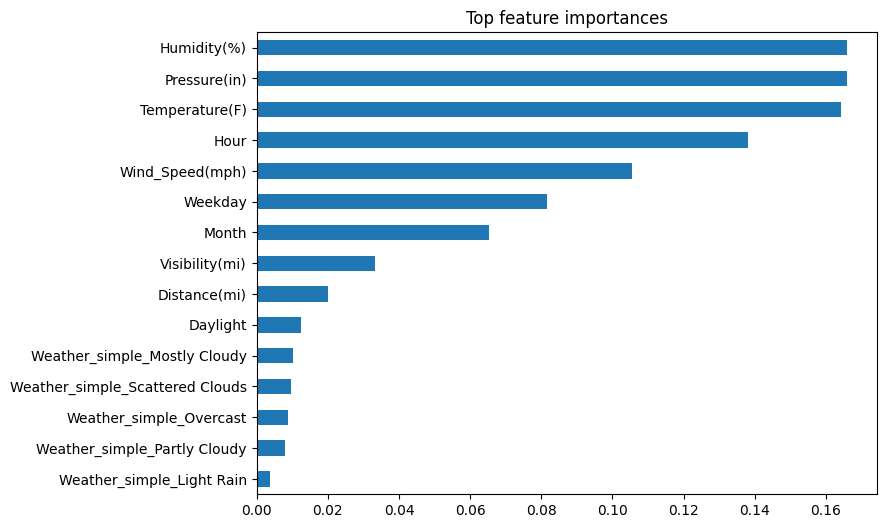

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feat_imp = pd.Series(model.feature_importances_, index=x_train.columns)
feat_imp.sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(8,6))
plt.title("Top feature importances")
plt.show()


In [ ]:
!pip install -q folium
import folium

sample = df.sample(n=1000, random_state=42)   # use 1k points for quick map
m = folium.Map(location=[sample['Start_Lat'].mean(), sample['Start_Lng'].mean()], zoom_start=6)
for _, r in sample.iterrows():
    color = 'red' if r['target']==1 else 'blue'
    folium.CircleMarker([r['Start_Lat'], r['Start_Lng']], radius=2, color=color, fill=True, fill_opacity=0.6).add_to(m)



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, scaler.transform(x), y, cv=3, scoring='roc_auc', n_jobs=-1)
print("CV AUC scores:", cv_scores, "mean:", cv_scores.mean())


CV AUC scores: [0.57102489 0.51078506 0.44156415] mean: 0.5077913673287945


In [ ]:
import joblib
joblib.dump(model, 'accident_rf_model.pkl')
joblib.dump(scaler, 'accident_scaler.pkl')


['accident_scaler.pkl']